In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/sidja/Documents/Intellipaat/Python/Stats & ML/Kaggle Datasets/Credit Card - Cleaning & Classification/clean_data/clean_data.csv")

# Columns Description & Task

* ID - This is the person's id
* Gender  - 0 is for Female & 1 is for Male
* Own_car - Whether the person ows a car
* Own_property - Whether the person has his own property
* Work_phone - Whether he has a work phone
* Phone - Whether he owns a personal phone
* Email - Whether he has an email
* Unemployed - Whether is currently unemployed
* Num_children - Number of children in his family
* Num_family - Number of family members
* Account_length - Years since the account has been open
* Total_income - Total income of the person
* Age - The age of the person
* Years_employed - Total years of employment
* Income_type - Source of Income
* Education_type - Highest Education
* Family_status - Relationship Status
* Housing_type - Type of housing
* Occupation_type - Type of Work
* Target - 1 for high risk, 0 for low risk


**The task in hand is to predict whether the customer is at high(1) or low(0) risk of default, based on which the bank decides whether to give the person a credit card or not**

# Data Pre-Processing

In [3]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,Unnamed: 20,Unnamed: 21
0,5008804,Male,Yes,Yes,Yes,No,No,No,0,2,...,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,Yes,NaN,NaN
1,5008806,Male,Yes,Yes,No,No,No,No,0,2,...,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,No,NaN,NaN
2,5008808,Female,No,Yes,No,Yes,Yes,No,0,1,...,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,No,NaN,NaN
3,5008812,Female,No,Yes,No,No,No,Yes,0,1,...,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,No,NaN,NaN
4,5008815,Male,Yes,Yes,Yes,Yes,Yes,No,0,2,...,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,No,NaN,NaN


In [4]:
df.shape


# The dataset has 9709 rows and 20 columns

(9709, 22)

In [7]:
df = df.drop(['Unnamed: 20','Unnamed: 21'], axis = 1)

In [8]:
df.info()


# After having a look at the top 5 rows and comparing the Dtype, we can confirm that the type of data here correctly tagged.
# We should now check for missing values & duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   object 
 2   Own_car          9709 non-null   object 
 3   Own_property     9709 non-null   object 
 4   Work_phone       9709 non-null   object 
 5   Phone            9709 non-null   object 
 6   Email            9709 non-null   object 
 7   Unemployed       9709 non-null   object 
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   int64  
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [9]:
df.isna().sum()

# There are no missing values in the dataset

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

In [10]:
df.duplicated().sum()

# There are no duplicates values in the dataset

0

In [11]:
df.describe()


# We can see that the Num_children column's 75th percentile is 1 while the max is 19 and for Num_family 
# the 75th percentile is 3 while the max is 20. That implies that there must be outliers in those 2 columns.
# Same goes for the Total_Income & Years_employed column. Lets plot them in a box plot and check for outleirs

,ID,Num_children,Num_family,Account_length,Total_income,Age,Years_employed
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000
mean,5.076105e+06,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730
std,4.080270e+04,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241
min,5.008804e+06,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000
25%,5.036955e+06,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150
50%,5.069449e+06,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884
75%,5.112986e+06,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031
max,5.150479e+06,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733


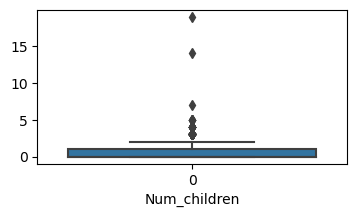

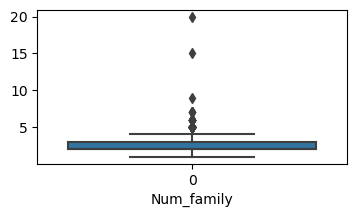

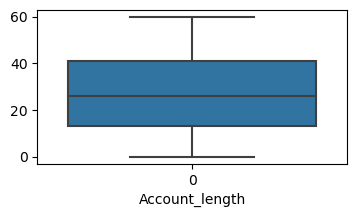

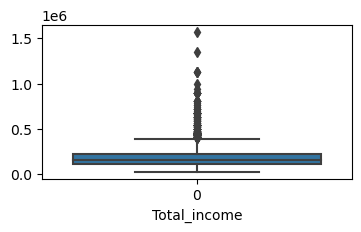

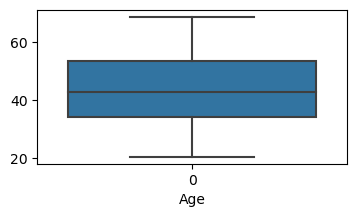

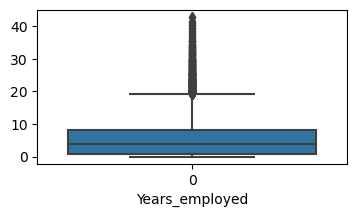

In [12]:
# We don't have to plot all the columns, since most of them are binary. We can skip the plotting for those & object types


out_col = ['Num_children','Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']

for i in out_col:
    plt.figure(figsize = (4,2))
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

## Lets deal with the outliers

In [13]:
q1 = df['Years_employed'].quantile(0.25)
q3 = df['Years_employed'].quantile(0.75)
IQR = q3-q1
UL = q3 + IQR
LL = q1 - IQR

df = df[(df['Years_employed']>LL) & (df['Years_employed']<UL)]
df.shape

(8968, 20)

In [14]:
q1 = df['Total_income'].quantile(0.25)
q3 = df['Total_income'].quantile(0.75)
IQR = q3-q1
UL = q3 + IQR
LL = q1 - IQR

df = df[(df['Total_income']>LL) & (df['Total_income']<UL)]
df.shape

(8362, 20)

In [15]:
q1 = df['Num_family'].quantile(0.25)
q3 = df['Num_family'].quantile(0.75)
IQR = q3-q1
UL = q3 + IQR
LL = q1 - IQR

df = df[(df['Num_family']>LL) & (df['Num_family']<UL)]
df.shape

(5839, 20)

In [16]:
q1 = df['Num_children'].quantile(0.25)
q3 = df['Num_children'].quantile(0.75)
IQR = q3-q1
UL = q3 + IQR
LL = q1 - IQR

df = df[(df['Num_children']>LL) & (df['Num_children']<UL)]
df.shape

(5790, 20)

In [17]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,Male,Yes,Yes,No,No,No,No,0,2,29,112500,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,No
4,5008815,Male,Yes,Yes,Yes,Yes,Yes,No,0,2,5,270000,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,No
5,5008819,Male,Yes,Yes,No,No,No,No,0,2,17,135000,48.674511,3.269061,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,No
6,5008825,Female,Yes,No,No,No,No,No,0,2,25,130500,29.210730,3.019911,Working,Incomplete higher,Married,House / apartment,Accountants,Yes
7,5008830,Female,No,Yes,No,Yes,No,No,0,2,31,157500,27.463945,4.021985,Working,Secondary / secondary special,Married,House / apartment,Laborers,Yes


<Axes: >

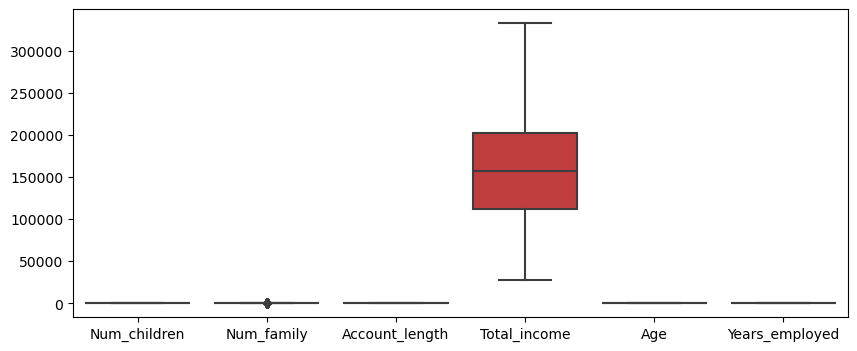

In [18]:
# Lets check if we have correctly removed the outliers for our model
out_col = ['Num_children','Num_family', 'Account_length', 'Total_income', 'Age', 'Years_employed']

plt.figure(figsize = (10,4))
sns.boxplot(df[out_col])

C:\Users\sidja\AppData\Local\Temp\ipykernel_22588\555102050.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues')


<Axes: >

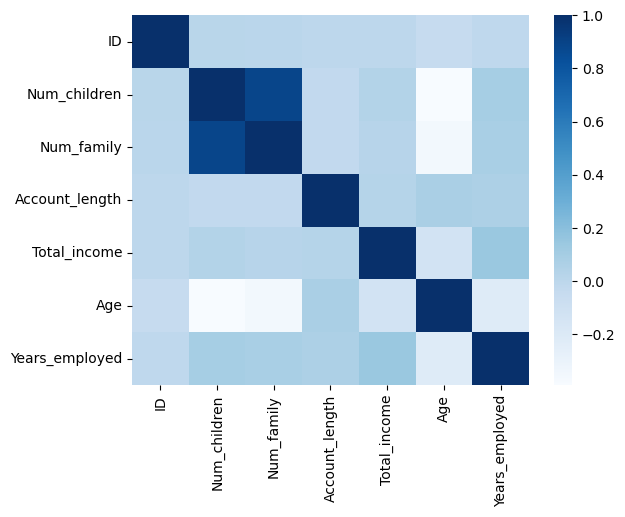

In [19]:
# Now that we have dealth with the outliers, we need to check for the correlation


sns.heatmap(df.corr(), cmap = 'Blues')



# We can see that there is strong correlation between the number of children & family members.
# Thus we can remove one of them. I prefer removing the children in this case, since the family member should include them

In [20]:
df = df.drop('Num_children', axis = 1)

C:\Users\sidja\AppData\Local\Temp\ipykernel_22588\3635710015.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues')


<Axes: >

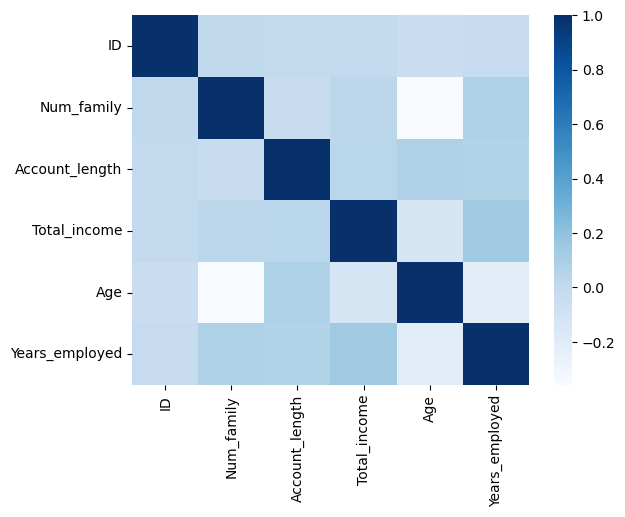

In [21]:
# Now lets check for the correlations again

sns.heatmap(df.corr(), cmap = 'Blues')

# I think we are good to go with our model building for the next part since it looks even as of now

## Dealing with categorical columns



In [22]:
df.head(1)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,Male,Yes,Yes,No,No,No,No,2,29,112500,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,No


In [23]:
# For keeping a track of the columns and their mappings, i use this simple loop to refer to the original values

for i in ['Income_type','Education_type','Family_status','Housing_type','Occupation_type']:
    cat_variable = list(df[i].unique())
    cat_variable.sort()
    print("The Original Values are: " ,cat_variable)
    print("The mapped Values shall be: " ,np.arange(len(cat_variable)))

The Original Values are:  ['Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working']
The mapped Values shall be:  [0 1 2 3 4]
The Original Values are:  ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']
The mapped Values shall be:  [0 1 2 3 4]
The Original Values are:  ['Civil marriage', 'Married', 'Separated', 'Single / not married', 'Widow']
The mapped Values shall be:  [0 1 2 3 4]
The Original Values are:  ['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents']
The mapped Values shall be:  [0 1 2 3 4 5]
The Original Values are:  ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff', 'Other', 'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff']
The ma

In [24]:
# We need to encode the Categorical Columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Income_type'] = le.fit_transform(df['Income_type'])

In [25]:
df['Education_type'] = le.fit_transform(df['Education_type'])
df['Family_status'] = le.fit_transform(df['Family_status'])
df['Housing_type'] = le.fit_transform(df['Housing_type'])
df['Occupation_type'] = le.fit_transform(df['Occupation_type'])
df['Own_car'] = le.fit_transform(df['Own_car'])
df['Own_property'] = le.fit_transform(df['Own_property'])
df['Work_phone'] = le.fit_transform(df['Work_phone'])
df['Phone'] = le.fit_transform(df['Phone'])
df['Email'] = le.fit_transform(df['Email'])
df['Unemployed'] = le.fit_transform(df['Unemployed'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Target'] = le.fit_transform(df['Target'])

df.head(1)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,1,1,1,0,0,0,0,2,29,112500,58.793815,3.104787,4,4,1,1,17,0


In [26]:
## Lets try building the model with these variables

## Train Test Split for Model

In [27]:
df.head(5)

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,5008806,1,1,1,0,0,0,0,2,29,112500,58.793815,3.104787,4,4,1,1,17,0
4,5008815,1,1,1,1,1,1,0,2,5,270000,46.193967,2.105450,4,1,1,1,0,0
5,5008819,1,1,1,0,0,0,0,2,17,135000,48.674511,3.269061,0,4,1,1,8,0
6,5008825,0,1,0,0,0,0,0,2,25,130500,29.210730,3.019911,4,2,1,1,0,1
7,5008830,0,0,1,0,1,0,0,2,31,157500,27.463945,4.021985,4,4,1,1,8,1


**Let us work with the model including all the independent variables for now**

In [28]:
# We dont really need the ID column, so we can drop that

In [29]:
df = df.drop('ID', axis = 1)

In [30]:
# Importing the Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
LogReg = LogisticRegression()

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=10 )

In [34]:
LogReg.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = LogReg.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1737
           1       0.00      0.00      0.00         0

    accuracy                           0.86      1737
   macro avg       0.50      0.43      0.46      1737
weighted avg       1.00      0.86      0.92      1737



C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
confusion_matrix(y_pred,y_test)

array([[1493,  244],
       [   0,    0]], dtype=int64)

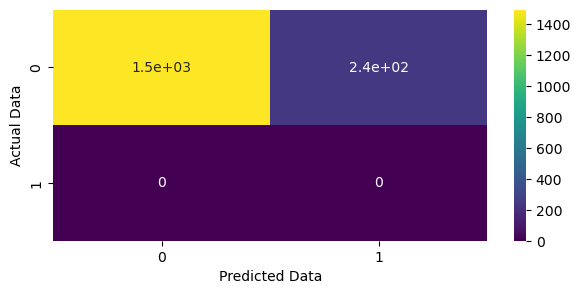

In [39]:
cm = confusion_matrix(y_pred,y_test)
plt.figure(figsize = (7,3))
sns.heatmap(cm, annot = True, cmap = 'viridis')
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.show()

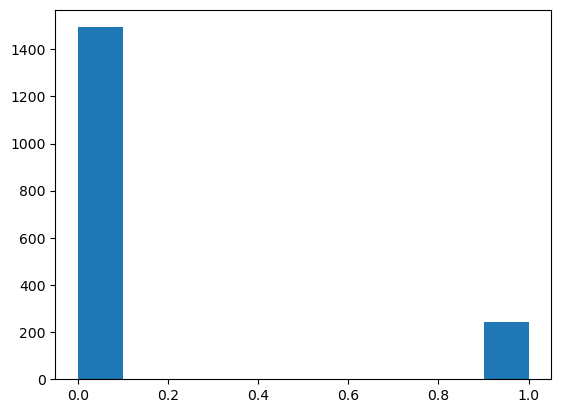

In [40]:
plt.hist(y_test)
plt.show()


# Here we can clearly see that the data is highly imbalanced towards 0 and hence our model trained better towards identifying 
# 0s(low risks) correctly and did not predict the 1s(high risks)

In [41]:
df2 = pd.read_csv("C:/Users/sidja/Documents/Intellipaat/Python/Stats & ML/Kaggle Datasets/Credit Card - Cleaning & Classification/clean_data/clean_data.csv")

In [42]:
df2['Target'].value_counts()

No     8426
Yes    1283
Name: Target, dtype: int64

In [43]:
# The ratio is the same in our given dataset. We need to dig deeper & scale the indepedent variables and test further

In [44]:
from sklearn.utils import class_weight

#Creating a balanced class weight
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Create logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights_dict)
model.fit(x_train, y_train)


LogisticRegression(class_weight={0: 0.5737542468856173, 1: 3.8896353166986564})

In [45]:
y_pred1 = model.predict(x_test)

In [46]:
print(classification_report(y_pred1, y_test))


#The model has performed poorly on balanced variables, where it could not detect low risk cases at all

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.14      0.25      1737

    accuracy                           0.14      1737
   macro avg       0.50      0.07      0.12      1737
weighted avg       1.00      0.14      0.25      1737



C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
df.shape

(5790, 18)

## Let us try balancing the Target Variable by duplicating the records having high risk

In [48]:
df2 = df[(df["Target"]==1)]

In [49]:
df2.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
6,0,1,0,0,0,0,0,2,25,130500,29.210730,3.019911,4,2,1,1,0,1
7,0,0,1,0,1,0,0,2,31,157500,27.463945,4.021985,4,4,1,1,8,1
19,0,0,0,0,1,0,0,2,43,157500,37.350527,13.267897,0,1,1,1,6,1
23,1,0,1,0,1,0,0,2,15,157500,43.880436,2.433999,4,4,1,1,12,1
32,0,1,1,0,0,0,0,2,17,225000,39.562756,7.603168,0,4,1,1,8,1


(array([5025.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         765.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

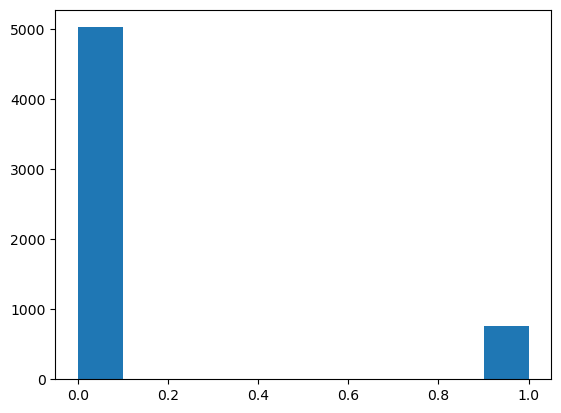

In [50]:
plt.hist(df['Target'])

In [51]:
new_df = pd.concat([df,df2])

(array([5025.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1530.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

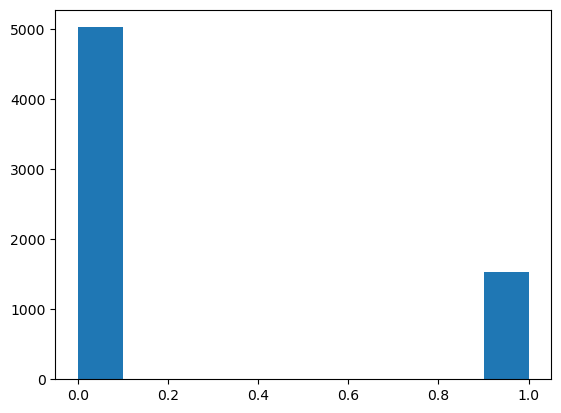

In [52]:
plt.hist(new_df['Target'])

# We tried to balance the number of high risk profiles for the model 

In [53]:
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10 )

In [55]:
logreg2 = LogisticRegression()

In [56]:
logreg2.fit(x_train,y_train)

LogisticRegression()

In [57]:
new_pred = logreg2.predict(x_test)

In [58]:
print(classification_report(new_pred,y_test))


# Still the model could not predict the High Risk cases

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      1311
           1       0.00      0.00      0.00         0

    accuracy                           0.75      1311
   macro avg       0.50      0.38      0.43      1311
weighted avg       1.00      0.75      0.86      1311



C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


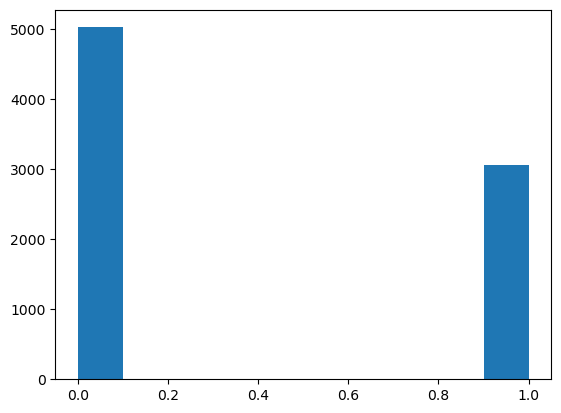

              precision    recall  f1-score   support

           0       0.96      0.63      0.76      1543
           1       0.06      0.49      0.10        74

    accuracy                           0.62      1617
   macro avg       0.51      0.56      0.43      1617
weighted avg       0.92      0.62      0.73      1617



In [59]:
# We try it adding 1 more time to make it a bit more balanced as a last resort for now




df3 = new_df[(new_df["Target"]==1)]
new_df2 = pd.concat([new_df,df3])
plt.hist(new_df2['Target'])
plt.show()
x = new_df2.iloc[:,:-1]
y = new_df2.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10 )
logreg3 = LogisticRegression()
logreg3.fit(x_train,y_train)
new_pred2 = logreg3.predict(x_test)
print(classification_report(new_pred2,y_test))



# The Model has performed much better and identified some high risk cases finally

(array([5025.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         765.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

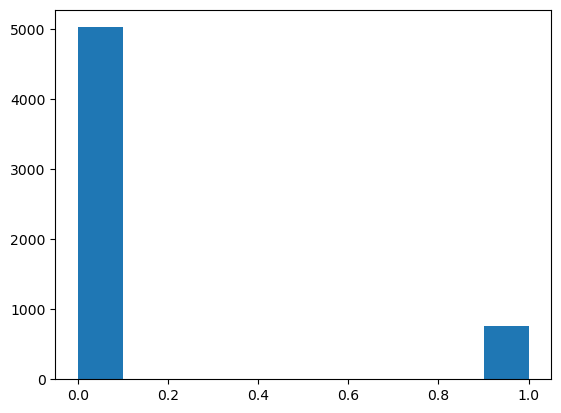

In [60]:
plt.hist(df['Target'])

In [61]:
actual_df = df

In [62]:
actual_df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,1,1,1,0,0,0,0,2,29,112500,58.793815,3.104787,4,4,1,1,17,0
4,1,1,1,1,1,1,0,2,5,270000,46.193967,2.105450,4,1,1,1,0,0
5,1,1,1,0,0,0,0,2,17,135000,48.674511,3.269061,0,4,1,1,8,0
6,0,1,0,0,0,0,0,2,25,130500,29.210730,3.019911,4,2,1,1,0,1
7,0,0,1,0,1,0,0,2,31,157500,27.463945,4.021985,4,4,1,1,8,1


## Trying the new model on our actual Data Frame

In [63]:
x = actual_df.iloc[:,:-1]
y = actual_df.iloc[:,-1]

print(df.shape,x.shape, y.shape)

(5790, 18) (5790, 17) (5790,)


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =1)

In [65]:
fpred = logreg3.predict(x_test)

In [66]:
print(classification_report(fpred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1115
           1       0.11      0.35      0.17        43

    accuracy                           0.87      1158
   macro avg       0.54      0.62      0.55      1158
weighted avg       0.94      0.87      0.90      1158



**The model has actually adapted better and could predict few high risk cases. This again may or may not be accepted, The financials has to be checked on this. There might be some cases which could be high risk but are classified as low and hence the company could possibly incurr losses, while there also might be some cases which are low risks but classified as high, resulting in a loss of revenue eventually.** 

**Again, we started by taking all the variables without choosing among them. We can now go for feature scaling as well as choosing various mixes of variables, which in turn might help in getting a better trained model.**

**We also need to test various other models like DecisionTree & RandomForest on all of these parameters**

# Feature Selection

In [67]:
actual_df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
1,1,1,1,0,0,0,0,2,29,112500,58.793815,3.104787,4,4,1,1,17,0
4,1,1,1,1,1,1,0,2,5,270000,46.193967,2.105450,4,1,1,1,0,0
5,1,1,1,0,0,0,0,2,17,135000,48.674511,3.269061,0,4,1,1,8,0
6,0,1,0,0,0,0,0,2,25,130500,29.210730,3.019911,4,2,1,1,0,1
7,0,0,1,0,1,0,0,2,31,157500,27.463945,4.021985,4,4,1,1,8,1


In [68]:
X = actual_df.iloc[:,:-1]
y = actual_df.iloc[:,-1]

## Variance Scaler

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [70]:
X_train_v1, X_test_v1,y_train_v1,y_test_v1 = X_train.copy(), X_test.copy(),y_train.copy(),y_test.copy()

In [71]:
X_train_v1.var(axis = 0)

Gender             2.282504e-01
Own_car            2.362362e-01
Own_property       2.214483e-01
Work_phone         1.667791e-01
Phone              2.046593e-01
Email              7.789557e-02
Unemployed         1.575647e-01
Num_family         1.779159e-01
Account_length     2.767216e+02
Total_income       4.047335e+09
Age                1.346683e+02
Years_employed     1.631071e+01
Income_type        3.050501e+00
Education_type     1.647608e+00
Family_status      2.670182e-01
Housing_type       8.238851e-01
Occupation_type    1.865055e+01
dtype: float64

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train_v1 = scaler.fit_transform(X_train_v1)

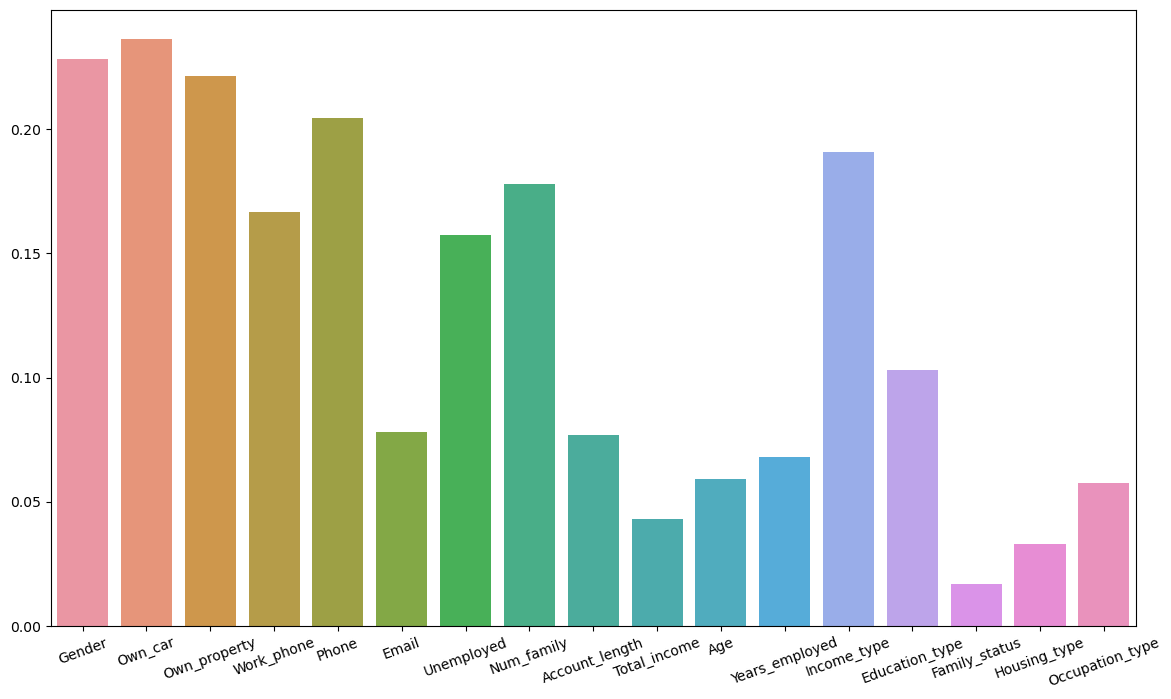

In [74]:
scaled_variance = scaled_X_train_v1.var(axis = 0)
col= X.columns

plt.figure(figsize = (14,8))
sns.barplot(x = X.columns, y = scaled_variance)
plt.xticks(rotation=20)
plt.show()

In [75]:
X_train_v1.head(1)

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
1504,0,1,1,0,0,0,0,2,16,234000,51.458962,6.806437,4,4,1,1,8


In [76]:
# I will drop the 5 columns having least variance

sel_X_train_v1 = X_train_v1.drop(['Income_type', 'Family_status','Housing_type'], axis = 1)
sel_X_test_v1 = X_test_v1.drop(['Income_type', 'Family_status','Housing_type'], axis = 1)

In [77]:
logreg3.fit(sel_X_train_v1,y_train)


pred_v1 = logreg3.predict(sel_X_test_v1)

cm_v1 = classification_report(y_test_v1, pred_v1)

print(cm_v1)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1528
           1       0.00      0.00      0.00       209

    accuracy                           0.88      1737
   macro avg       0.44      0.50      0.47      1737
weighted avg       0.77      0.88      0.82      1737



C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


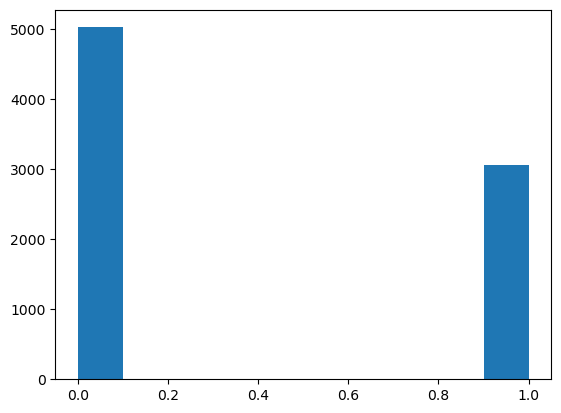

              precision    recall  f1-score   support

           0       0.96      0.63      0.76      1544
           1       0.06      0.49      0.11        73

    accuracy                           0.62      1617
   macro avg       0.51      0.56      0.43      1617
weighted avg       0.92      0.62      0.73      1617



In [78]:
## Trying to predict the new data having less features on the old model which could predict high risk cases


# Re run the old model

# We try it adding 1 more time to make it a bit more balanced as a last resort for now




df3 = new_df[(new_df["Target"]==1)]
new_df2 = pd.concat([new_df,df3])
plt.hist(new_df2['Target'])
plt.show()
x = new_df2.drop(['Family_status','Housing_type','Income_type','Target'], axis = 1)
y = new_df2.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10 )
logreg3 = LogisticRegression()
logreg3.fit(x_train,y_train)
new_pred2 = logreg3.predict(x_test)
print(classification_report(new_pred2,y_test))



# The Model has performed much better and identified some high risk cases finally

In [79]:
pred_v1 = logreg3.predict(x_test)
cr_v1 = classification_report(y_test, pred_v1)
print(cr_v1)

              precision    recall  f1-score   support

           0       0.63      0.96      0.76      1005
           1       0.49      0.06      0.11       612

    accuracy                           0.62      1617
   macro avg       0.56      0.51      0.43      1617
weighted avg       0.58      0.62      0.51      1617



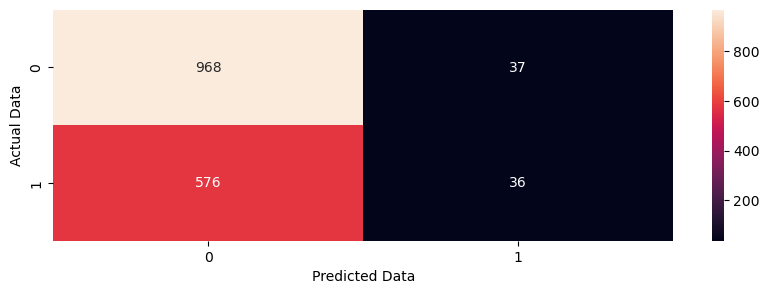

In [80]:
cm_v1 = confusion_matrix(y_test,pred_v1)
plt.figure(figsize = (10,3))
sns.heatmap(cm_v1, annot = True, fmt = 'd')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

# We could finally get the model to train on catching few more high risk cases

In [81]:
cm_v1

array([[968,  37],
       [576,  36]], dtype=int64)

# Receiver operating characteristics curve

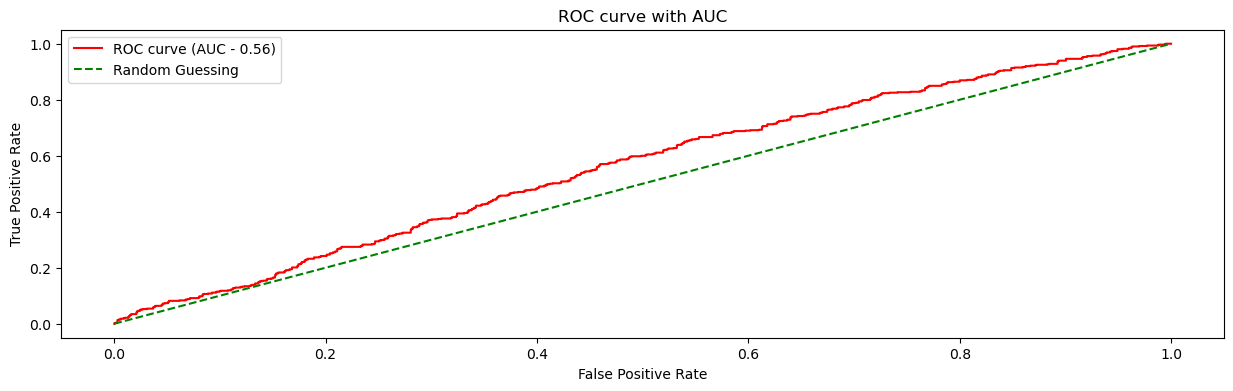

In [82]:
from sklearn.metrics import roc_curve, auc

y_probs = logreg3.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (15, 4))
plt.title("ROC curve with AUC")
plt.plot(fpr, tpr, "red", label = f"ROC curve (AUC - {roc_auc:.2f})")
plt.plot([0,1], [0,1], "g--", label = "Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend();

# Trying VIF on the Dataset

In [92]:
df.shape

(5790, 18)

In [93]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

            feature        VIF
0            Gender   1.862876
1           Own_car   1.889673
2      Own_property   3.277064
3        Work_phone   1.524974
4             Phone   1.541644
5             Email   1.120161
6        Unemployed   3.345017
7        Num_family  17.163538
8    Account_length   3.738513
9      Total_income   8.038467
10              Age  21.420933
11   Years_employed   3.071251
12      Income_type   3.286485
13   Education_type   7.660427
14    Family_status   4.228030
15     Housing_type   2.938127
16  Occupation_type   6.082110


In [96]:
x = x.drop('Age', axis = 1)

vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

            feature        VIF
0            Gender   1.862874
1           Own_car   1.889416
2      Own_property   3.168352
3        Work_phone   1.523811
4             Phone   1.531953
5             Email   1.118563
6        Unemployed   2.125878
7        Num_family  16.439247
8    Account_length   3.640660
9      Total_income   7.596556
10   Years_employed   2.889645
11      Income_type   3.235917
12   Education_type   7.002242
13    Family_status   4.138168
14     Housing_type   2.937867
15  Occupation_type   5.921087


In [97]:
x = x.drop('Num_family', axis = 1)
vif_data = pd.DataFrame()

vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

            feature       VIF
0            Gender  1.862660
1           Own_car  1.879009
2      Own_property  3.036839
3        Work_phone  1.509617
4             Phone  1.530824
5             Email  1.113340
6        Unemployed  2.122796
7    Account_length  3.558056
8      Total_income  6.721907
9    Years_employed  2.848788
10      Income_type  3.121438
11   Education_type  6.321629
12    Family_status  4.060261
13     Housing_type  2.756001
14  Occupation_type  5.624388


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle = True,test_size = 0.3, random_state= 10)

In [104]:
y_train.value_counts()

0    3532
1     521
Name: Target, dtype: int64

In [107]:
y_test.value_counts()

0    1493
1     244
Name: Target, dtype: int64

In [108]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
print(confusion_matrix(pred,y_test,))
print(classification_report(y_test,pred))

[[1493  244]
 [   0    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1493
           1       0.00      0.00      0.00       244

    accuracy                           0.86      1737
   macro avg       0.43      0.50      0.46      1737
weighted avg       0.74      0.86      0.79      1737



C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sidja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The normal VIF with LogReg turned out to be equally bad like the first model, we got to duplicate the records inorder to get a more balanced dataset and try it again**

In [122]:
x['Target']= y

In [123]:
x.shape

(5790, 16)

In [125]:
x['Target'].value_counts()

0    5025
1     765
Name: Target, dtype: int64

In [128]:
x = pd.concat([x, x[(x['Target']==1)]])

In [129]:
x['Target'].value_counts()

0    5025
1    1530
Name: Target, dtype: int64

In [130]:
x = pd.concat([x, x[(x['Target']==1)]])
x['Target'].value_counts()

0    5025
1    3060
Name: Target, dtype: int64

In [135]:
scaler = MinMaxScaler()

In [141]:
scaled_df = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [144]:
scaled_df['Target'].value_counts()

0.0    5025
1.0    3060
Name: Target, dtype: int64

              precision    recall  f1-score   support

         0.0       0.97      0.62      0.76      2326
         1.0       0.06      0.55      0.11       100

    accuracy                           0.62      2426
   macro avg       0.51      0.59      0.43      2426
weighted avg       0.93      0.62      0.73      2426



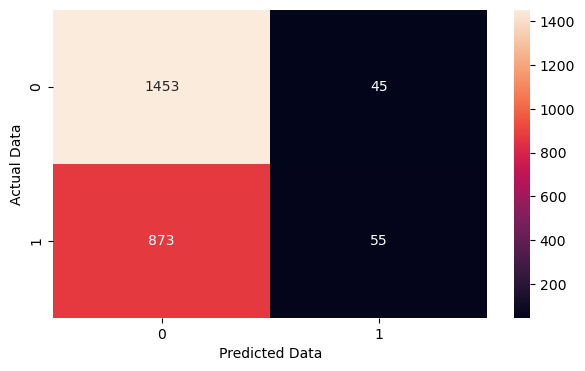

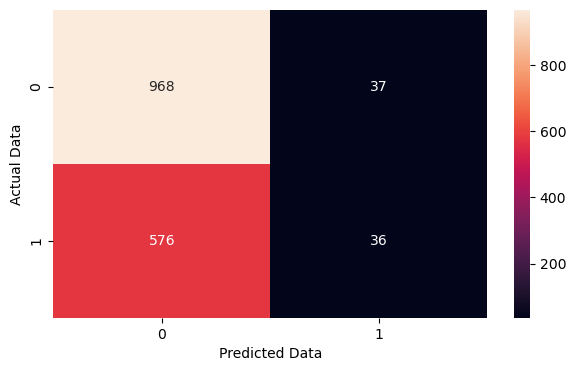

In [166]:
scaled_x = scaled_df.iloc[:,:-1]
scaled_y = scaled_df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(scaled_x,scaled_y,test_size= 0.3, shuffle = True, random_state = 10)

logreg.fit(x_train,y_train)
pred = logreg.predict(x_test)
print(classification_report(pred,y_test))

plt.figure(figsize = (7,4))
sns.heatmap(confusion_matrix(y_test,pred),annot = True, fmt = 'd')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

plt.figure(figsize = (7,4))
sns.heatmap(cm_v1, annot = True, fmt = 'd')
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()


## Conclusion based on Model Performance Metrics

The evaluation metrics showcase the performance of multiple models developed during the analysis, focusing on precision, recall, and F1-score for both high and low-risk classes.

1. **Model 1:**
   - Precision: 0.97 (low risk), 0.06 (high risk)
   - Recall: 0.62 (low risk), 0.55 (high risk)
   - F1-score: 0.76 (low risk), 0.11 (high risk)
   - Accuracy: 0.62

2. **Model 2:**
   - Precision: 0.86 (low risk), 0.00 (high risk)
   - Recall: 1.00 (low risk), 0.00 (high risk)
   - F1-score: 0.92 (low risk), 0.00 (high risk)
   - Accuracy: 0.86

3. **Model 3:**
   - Precision: 0.63 (low risk), 0.49 (high risk)
   - Recall: 0.96 (low risk), 0.06 (high risk)
   - F1-score: 0.76 (low risk), 0.11 (high risk)
   - Accuracy: 0.62

4. **Model 4:**
   - Precision: 0.96 (low risk), 0.06 (high risk)
   - Recall: 0.63 (low risk), 0.49 (high risk)
   - F1-score: 0.76 (low risk), 0.11 (high risk)
   - Accuracy: 0.62

5. **Model 5:**
   - Precision: 0.88 (low risk), 0.00 (high risk)
   - Recall: 1.00 (low risk), 0.00 (high risk)
   - F1-score: 0.94 (low risk), 0.00 (high risk)
   - Accuracy: 0.88

### Analysis and Reflection

The models exhibit varying performances. While Model 5 shows high accuracy in predicting low-risk cases, it struggles significantly in identifying high-risk instances. Conversely, Models 1, 3, and 4 demonstrate relatively balanced precision but lack in recall and F1-score for high-risk predictions.

The results suggest an imbalance in the dataset's classes, leading to models favoring accuracy by predicting predominantly low-risk instances while neglecting high-risk ones.

Further model refinement, exploration of advanced techniques (like oversampling methods), or alternative classifiers are necessary to improve the models' ability to identify high-risk instances, ensuring a robust credit risk assessment system.

### Note

The presented results are not in chronological order of refinement. Future iterations will focus on addressing class imbalance, enhancing high-risk prediction capabilities & ofcourse using other models like DT, RF,etc.